In [6]:
#import packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [7]:
#import database

df= pd.read_csv(r"C:\Users\shruthirajesh\OneDrive - Georgian College\attacks.csv",encoding = "ISO-8859-1")
df.head() 

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [8]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [1]:
#Unwanted columns are removed

In [9]:
df = df.drop(['Unnamed: 22', 'Unnamed: 23', 'Area', 'Case Number', 'Investigator or Source', 'Name', 'Location','Age', 'Injury', 'pdf', 'href formula', 'href','Time', 'Case Number.1', 'Case Number.2', 'original order','Date','Species '], axis = 1,errors='ignore')

In [10]:
df

,Year,Type,Country,Activity,Sex,Fatal (Y/N)
0,2018.0,Boating,USA,Paddling,F,N
1,2018.0,Unprovoked,USA,Standing,F,N
2,2018.0,Invalid,USA,Surfing,M,N
3,2018.0,Unprovoked,AUSTRALIA,Surfing,M,N
4,2018.0,Provoked,MEXICO,Free diving,M,N
...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#Treating missing and null values:

df.isna().sum()

Year           19423
Type           19425
Country        19471
Activity       19965
Sex            19986
Fatal (Y/N)    19960
dtype: int64

In [15]:
#There are over 19400 missing values present in each variable

In [12]:
len(df) 

25723

In [13]:
df.dropna(subset=['Year','Type','Country','Activity','Sex ','Fatal (Y/N)'], inplace = True)

In [14]:
df.isna().sum()

Year           0
Type           0
Country        0
Activity       0
Sex            0
Fatal (Y/N)    0
dtype: int64

In [15]:
df

,Year,Type,Country,Activity,Sex,Fatal (Y/N)
0,2018.0,Boating,USA,Paddling,F,N
1,2018.0,Unprovoked,USA,Standing,F,N
2,2018.0,Invalid,USA,Surfing,M,N
3,2018.0,Unprovoked,AUSTRALIA,Surfing,M,N
4,2018.0,Provoked,MEXICO,Free diving,M,N
...,...,...,...,...,...,...
6296,0.0,Unprovoked,AUSTRALIA,Swimming,M,Y
6297,0.0,Unprovoked,AUSTRALIA,Diving,M,Y
6298,0.0,Unprovoked,AUSTRALIA,Pearl diving,M,Y
6299,0.0,Unprovoked,USA,Swimming,M,Y


In [16]:
print(df.dtypes)
print('-'*60)
print(df.iloc[0])

Year           float64
Type            object
Country         object
Activity        object
Sex             object
Fatal (Y/N)     object
dtype: object
------------------------------------------------------------
Year             2018.0
Type            Boating
Country             USA
Activity       Paddling
Sex                   F
Fatal (Y/N)           N
Name: 0, dtype: object


In [18]:
#Converting 'Year' from float to Int
df.dropna(subset=['Year'], inplace = True)
df.Year = df.Year.astype(int)

In [19]:
df

,Year,Type,Country,Activity,Sex,Fatal (Y/N)
0,2018,Boating,USA,Paddling,F,N
1,2018,Unprovoked,USA,Standing,F,N
2,2018,Invalid,USA,Surfing,M,N
3,2018,Unprovoked,AUSTRALIA,Surfing,M,N
4,2018,Provoked,MEXICO,Free diving,M,N
...,...,...,...,...,...,...
6296,0,Unprovoked,AUSTRALIA,Swimming,M,Y
6297,0,Unprovoked,AUSTRALIA,Diving,M,Y
6298,0,Unprovoked,AUSTRALIA,Pearl diving,M,Y
6299,0,Unprovoked,USA,Swimming,M,Y


# Exploratory data analysis

# 1) What are the countries with most shark attacks?

In [80]:
print(df['Country'].value_counts())

USA                           1871
AUSTRALIA                     1030
SOUTH AFRICA                   454
PAPUA NEW GUINEA               102
BAHAMAS                         97
                              ... 
ANDAMAN / NICOBAR ISLANDAS       1
MALDIVE ISLANDS                  1
NICARAGUA                        1
NORTH SEA                        1
CEYLON (SRI LANKA)               1
Name: Country, Length: 190, dtype: int64


In [23]:
#Adding others column to group small values

In [21]:
def group(column, threshold):
    table = df[column].value_counts()
    grouped_columns = [i for i in table.index if table[i] < threshold]
    for n in grouped_columns:
        df.loc[df[column] == n, column] = 'Other'
    print(df[column].value_counts())

In [23]:
group('Country', 50)

USA                 1871
Other               1078
AUSTRALIA           1030
SOUTH AFRICA         454
PAPUA NEW GUINEA     102
BAHAMAS               97
NEW ZEALAND           97
BRAZIL                84
MEXICO                68
REUNION               51
Name: Country, dtype: int64


In [25]:
#Fuction to plot Horizontal Bar chart

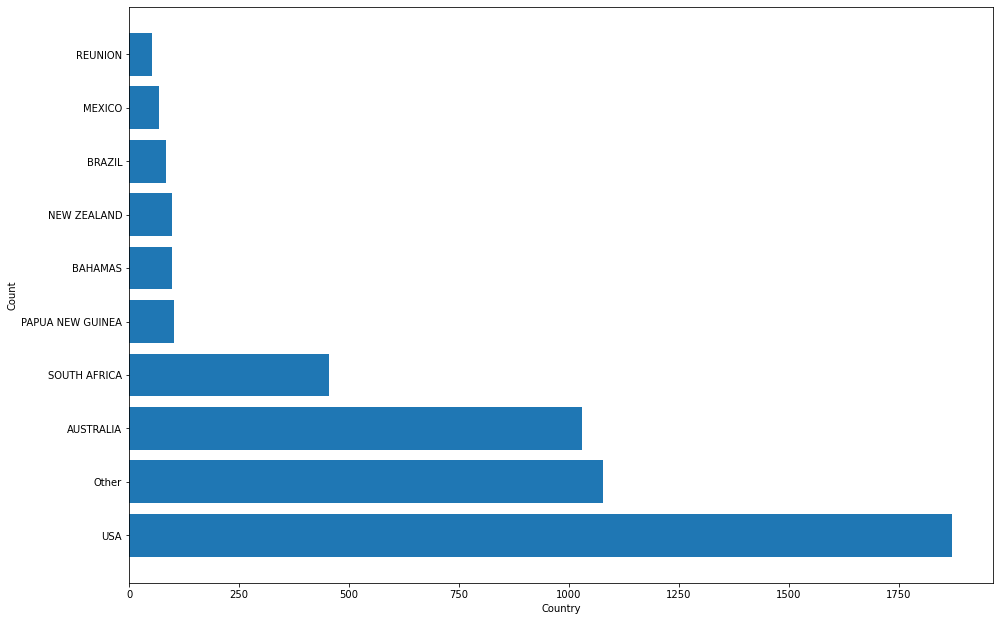

In [108]:
fig = plt.figure()
ax = fig.add_axes([2,2,2,2])
Country= ['USA','Other','AUSTRALIA','SOUTH AFRICA', 'PAPUA NEW GUINEA','BAHAMAS','NEW ZEALAND','BRAZIL','MEXICO','REUNION']
count = [1871,1078,1030,454,102,97,97,84,68,51]
ax.barh(Country,count)
ax.set_xlabel('Country')
ax.set_ylabel('Count')
plt.show()

# 2) What are the most activities prior to attack?

In [84]:
print(df['Activity'].value_counts())

Surfing                                                                                       911
Swimming                                                                                      753
Fishing                                                                                       321
Spearfishing                                                                                  295
Bathing                                                                                       143
                                                                                             ... 
Surf-fishing                                                                                    1
Feeding mullet to sharks                                                                        1
Dynamite fishing                                                                                1
Small boat with 2 men onboard hit a submerged coral formation. Men began swimming to shore      1
4 men were bathing  

In [ ]:
#Grouping some categories

In [85]:
df.loc[df['Activity'].str.contains('surf', case=False, na=False), 'Activity'] = 'Surfing'
df.loc[df['Activity'].str.contains('boarding', case=False, na=False), 'Activity'] = 'Surfing'
df.loc[df['Activity'].str.contains('swim', case=False, na=False), 'Activity'] = 'Swimming'
df.loc[df['Activity'].str.contains('fishing', case=False, na=False), 'Activity'] = 'Fishing'
df.loc[df['Activity'].str.contains('aquarium', case=False, na=False), 'Activity'] = 'Fishing'
df.loc[df['Activity'].str.contains('hunt', case=False, na=False), 'Activity'] = 'Fishing'
df.loc[df['Activity'].str.contains('trap', case=False, na=False), 'Activity'] = 'Fishing'
df.loc[df['Activity'].str.contains('walk', case=False, na=False), 'Activity'] = 'Swimming'
df.loc[df['Activity'].str.contains('wading', case=False, na=False), 'Activity'] = 'Swimming'
df.loc[df['Activity'].str.contains('float', case=False, na=False), 'Activity'] = 'Swimming'
df.loc[df['Activity'].str.contains('Treading water', case=False, na=False), 'Activity'] = 'Swimming'
df.loc[df['Activity'].str.contains('pull', case=False, na=False), 'Activity'] = 'Fishing'
df.loc[df['Activity'].str.contains('pick', case=False, na=False), 'Activity'] = 'Fishing'
df.loc[df['Activity'].str.contains('bath', case=False, na=False), 'Activity'] = 'Swimming'
df.loc[df['Activity'].str.contains('diving', case=False, na=False), 'Activity'] = 'Diving'
df.loc[df['Activity'].str.contains('snorkel', case=False, na=False), 'Activity'] = 'Diving'
df.loc[df['Activity'].str.contains('photo', case=False, na=False), 'Activity'] = 'Photo shoot'
df.loc[df['Activity'].str.contains('film', case=False, na=False), 'Activity'] = 'Filming'
df.loc[df['Activity'].str.contains('float', case=False, na=False), 'Activity'] = 'Floating'
df.loc[df['Activity'].str.contains('boarding', case=False, na=False), 'Activity'] = 'Boarding'
df.loc[df['Activity'].str.contains('wash', case=False, na=False), 'Activity'] = 'Washing'

In [86]:
print(df['Activity'].value_counts())

Swimming                                                                                        1387
Surfing                                                                                         1328
Fishing                                                                                          926
Diving                                                                                           511
Standing                                                                                          98
                                                                                                ... 
Cleaning a tank                                                                                    1
Survived US Naval aircraft crash, climbing onboard rescue vessel when he fell back into sea        1
Paddling outrigger canoe                                                                           1
Spent 8 days in dinghy                                                                     

In [87]:
group('Activity', 10)

Swimming          1387
Surfing           1328
Fishing            926
Other              594
Diving             511
Standing            98
Kayaking            30
Fell overboard      28
Washing             20
Canoeing            10
Name: Activity, dtype: int64


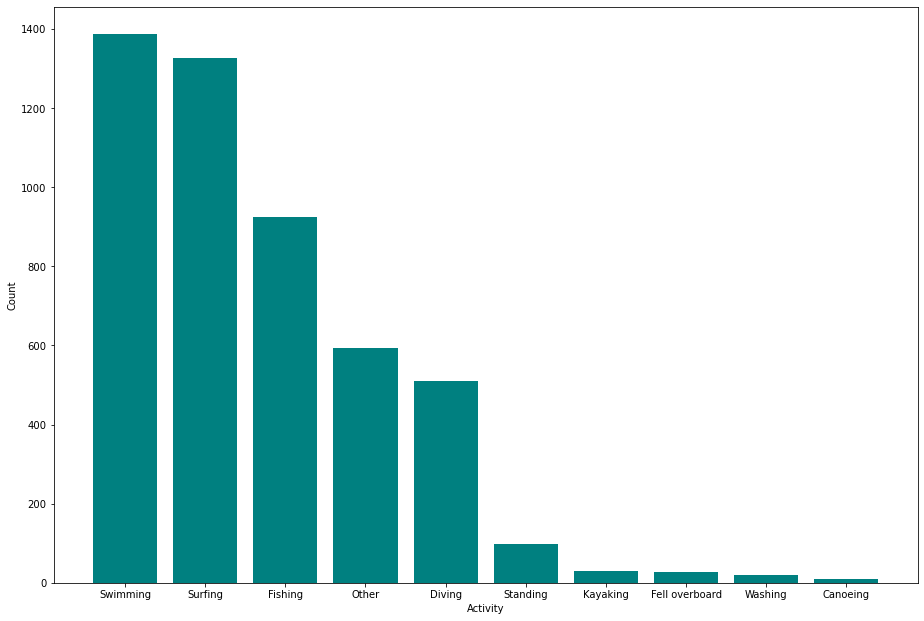

In [107]:
fig = plt.figure()
ax = fig.add_axes([2,2,2,2])
activity= ['Swimming','Surfing','Fishing','Other', 'Diving','Standing','Kayaking','Fell overboard','Washing','Canoeing']
count = [1387,1328,926,594,511,98,30,28,20,10]
ax.bar(activity,count,color='teal')
ax.set_xlabel('Activity')
ax.set_ylabel('Count')
plt.show()

# 3) What is the fatal and non-fatal rate?

In [94]:
print(df['Fatal (Y/N)'].value_counts())

N          3728
Y          1172
UNKNOWN      24
 N            5
M             1
2017          1
y             1
Name: Fatal (Y/N), dtype: int64


In [95]:
df.drop(df[df['Fatal (Y/N)'] == 'UNKNOWN'].index, inplace=True)
df.drop(df[df['Fatal (Y/N)'] == 'M'].index, inplace=True)
df.drop(df[df['Fatal (Y/N)'] == '2017'].index, inplace=True)
df.drop(df[df['Fatal (Y/N)'] == ' N'].index, inplace=True)
df.drop(df[df['Fatal (Y/N)'] == 'y'].index, inplace=True)


In [96]:
print(df['Fatal (Y/N)'].value_counts())

N    3728
Y    1172
Name: Fatal (Y/N), dtype: int64


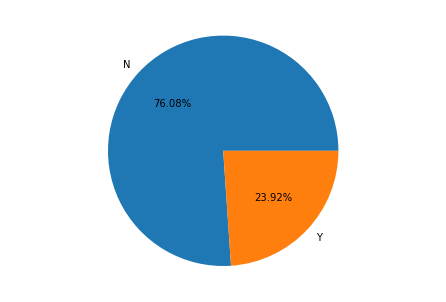

In [110]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
Fatal =['N','Y']
students = [3728,1172]
ax.pie(students, labels = Fatal,autopct='%1.2f%%')
plt.show()

# 4) What is the tendency of shark attacks from the year 1960 to 2010?

In [111]:
df = df.loc[df['Year'] >= 1960,:]
df = df.loc[df['Year'] <= 2010,:]

In [121]:
table = df.groupby('Year').count()

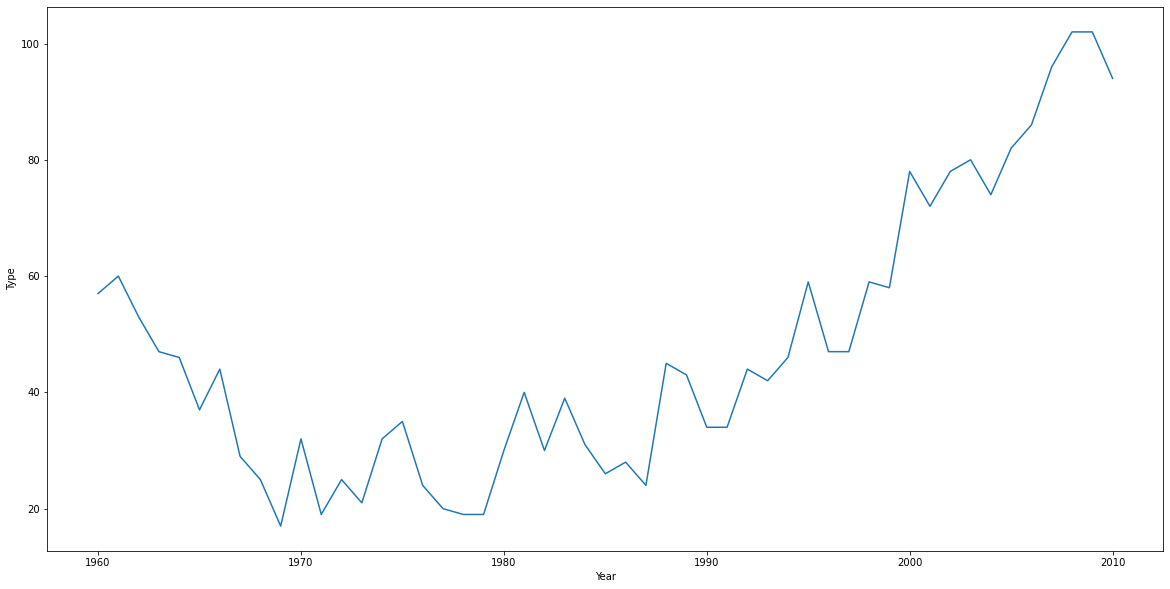

In [127]:
plt.figure(figsize = (20,10))
sns.lineplot(data=table, x="Year", y = table['Type'])
plt.show()